# Polinomio de Interpolacion de Lagrange

##### Dada una lista de datos: 
\begin{equation}
data = \left((x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)\right),
\end{equation}
##### Tenemos que el método de Lagrange permite construir un polinomio, al que denotaremos por $P(x)$, que interpola todos los datos de esa lista, i.e., $P(x_i)=y_i$. El polinomio de Lagrange viene dado por la siguiente fórmula: 
\begin{equation}
P(x)=\sum_{i=0}^n y_i l_i(x) = \sum_{i=0}^n \left(y_i \prod_{j \neq i} \frac{x-x_j}{x_i-x_j} \right) = \sum_{i=0}^n P_i(x)
\end{equation}

##### donde también definimos $P_i(x) = y_i l_i(x)$, entonces:

\begin{equation}
P_i(x) = y_i \prod_{j \neq i} \frac{x-x_j}{x_i-x_j}
\end{equation}
<hr/>

### Version simple pero no muy organizada ...
* comenzaremos construyendo y graficando los polinomios $P_i(x)$ considerando un set de datos particular:

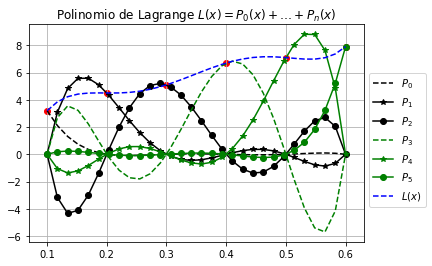

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Polinomios i-ésimos
def P(i,x):
    num = datos[i][1]
    for j in range(len(datos)):
        if j!=i:
            num *= (x-datos[j][0])/(datos[i][0]-datos[j][0])
    return num

# Polinomio completo de Lagrange:
def L(x):
    suma = 0 
    for i in range(len(datos)):
        suma += P(i,x)
    return suma

datos = [[0.1,3.2],[0.2,4.5],[0.3,5.1],[0.4,6.7],[0.5,7.1],[0.6,7.9]]

x = np.linspace(0.1,0.6,30)
colores = ['--k','-*k','-ok','--g','-*g','-og']
for i in range(len(datos)):
    y = P(i,x)
    plt.plot(x,y,colores[i], label = r'$P_{}$'.format(i))
    
y = L(x)
plt.plot(x,y,'--b', label = r'$L(x)$')
    
for point in datos:
    plt.scatter(point[0],point[1],color='r')

plt.title(r'Polinomio de Lagrange $L(x) = P_0(x)+ \dots + P_n(x)$')

plt.grid(True)
plt.legend(bbox_to_anchor=(0.7, 0, 0.5, 0.8))

* Del gráfico anterior como se satisfacen las condiciones $P_i(x_i) = y_i$ y $P_i(x_j) = 0$, siempre que $j \neq i$. 
* Así mismo vemos que $L(x)$ efectivamente pasa por todos los puntos de la lista de datos considerada.
<hr/>

### Version formal y definitiva ...

In [23]:
# construimos nuestra funcion de interpolacion de Lagrange
def LagrangePol(datos):
    # la funcion LagrangePol crea un objeto que evalua un polinomio
    # en un cierto valor de x
    def L(k, x):  # pol $L_k(x)=\prod\limits_{i \neq k}\frac{x-x_i}{x_k-x_i}$
        out = 1.0
        for i, p in enumerate(datos):
            if i != k:
                out *= (x-p[0])/(datos[k][0]-p[0])
        return out

    def P(x):  # polinomio $P(x)=\sum\limits_{k}f(x_k)L_k(x)$
        lag = 0.0
        for k, p in enumerate(datos):
            lag += p[1]*L(k, x)
        return lag

    return P

* Pero ...  ¿Como utilizar la funcion LagrangePol?

In [24]:
Pl = LagrangePol(datos) # primero creamos el objeto para nuestra lista de datos
Pl(0.55) # luego lo evaluamos en un valor particular de x

6.991015624999999

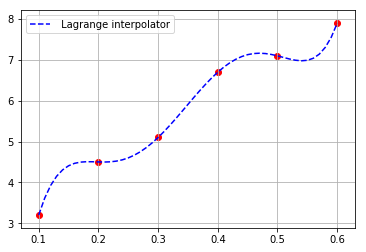

In [29]:
# Vamos a graficar el polinomio resultante sobre un cierto intervalo [0.0,0.7].
# y comparamos con los datos originales
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.1,0.61,0.01)
y = np.zeros(np.size(x))
for i in range(np.size(x)):
    y[i]=Pl(x[i])
    
plt.plot(x,y,'--b',label=' Lagrange interpolator')
for p in datos:
    plt.scatter(p[0],p[1],c='r')
plt.legend()
plt.grid(True)
plt.show()